# Bike sharing assignment

### Import the required libraries

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Load the dataset

In [370]:
# Read the data into a pandas dataframe
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Perform basic checks
 - Check for nulls
 - Check for missing data
 - Check for data types

In [371]:
df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [372]:
# check for duplicates
df.duplicated().sum()

0

In [373]:
print(df.shape)
print(df.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [374]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Perform data clean-up
 - drop unnecessary features from the dataset

In [375]:
# Based on the data dictionary
# - instant is just record number and doesnt have any business significance
# - dteday is date which is better available as yr, mnth and weekday/holiday/workingday
# - casual / registered are simple categories of the rental and is not significant for the target of increasing total count of rentals

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [376]:
df.shape

(730, 12)

### Map the values for categorical variables based on the data dictionary

In [377]:

# Encoding the season column
df.season = df.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [378]:
# Encoding the month column

df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})


In [379]:
# Encoding the weekday column

df.weekday = df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [380]:
# Encoding the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Cloudy',3:'Light_SnowRain',4:'Heavy_SnowRain'})

In [381]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Perform visual data analysis / EDA

<Figure size 2000x1600 with 0 Axes>

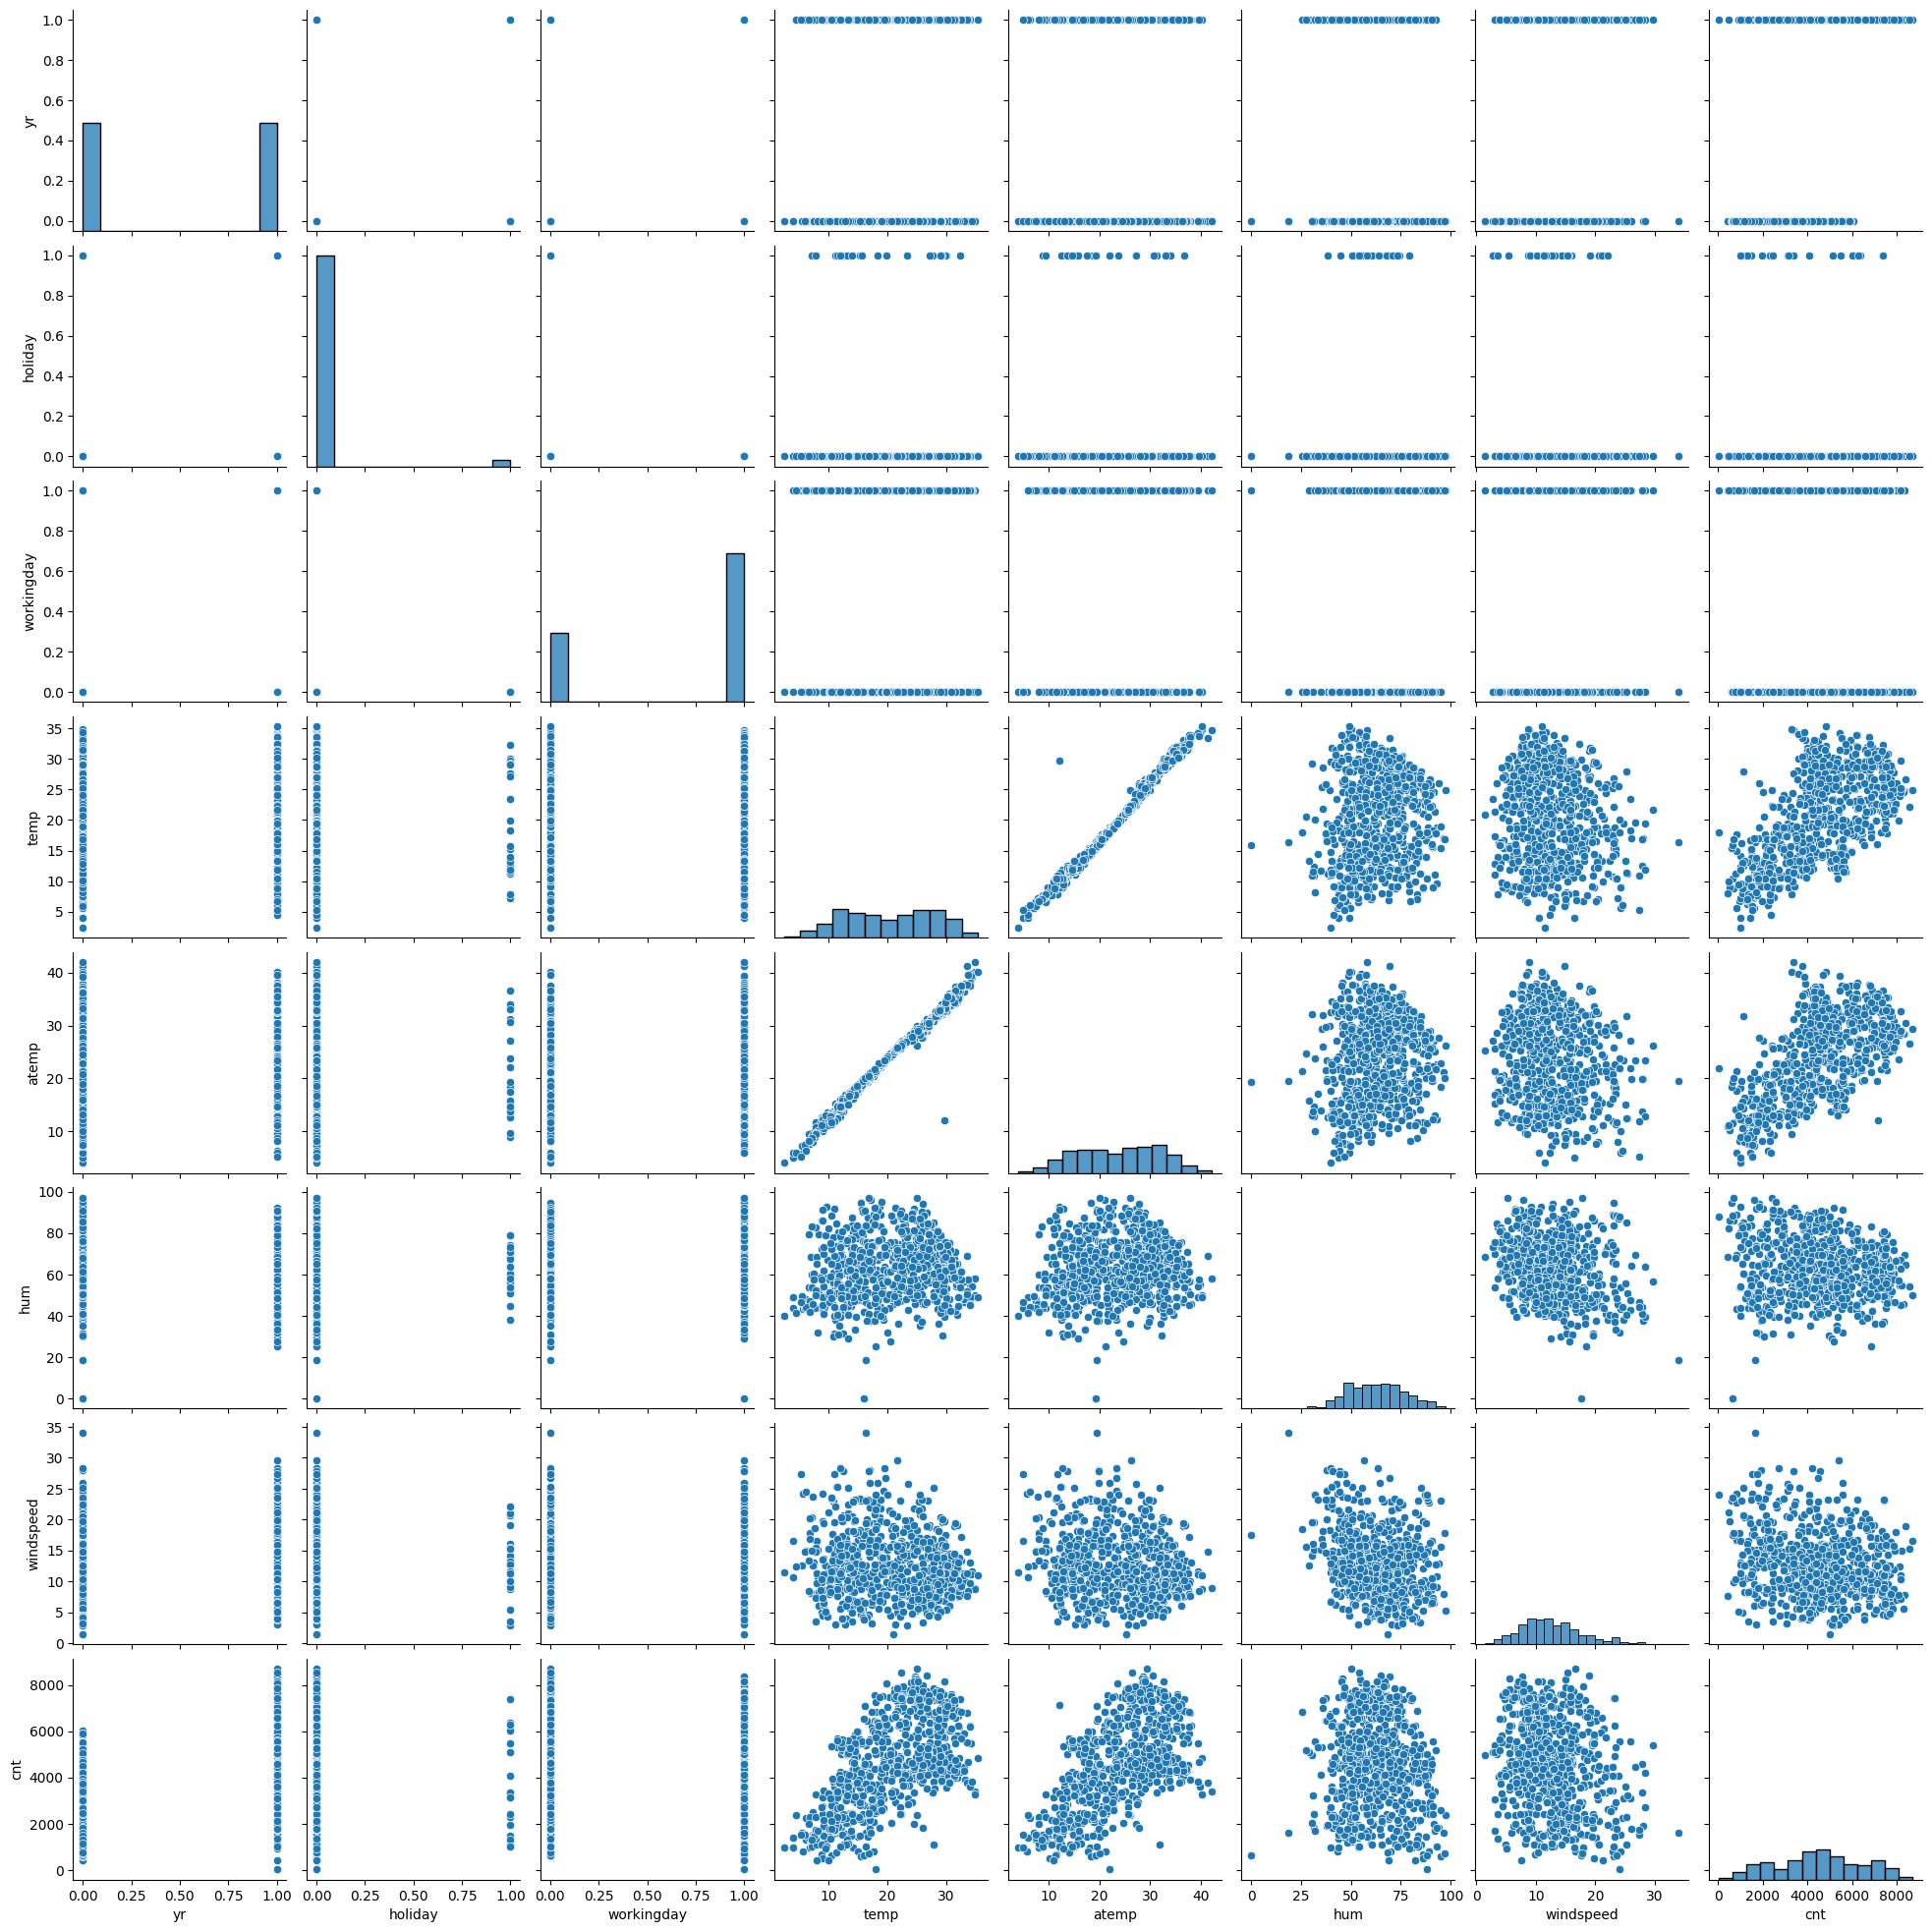

In [382]:
# Plot the numerical data for observing relationship
plt.figure(figsize=(20,16))
sns.pairplot(df)
plt.show()

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


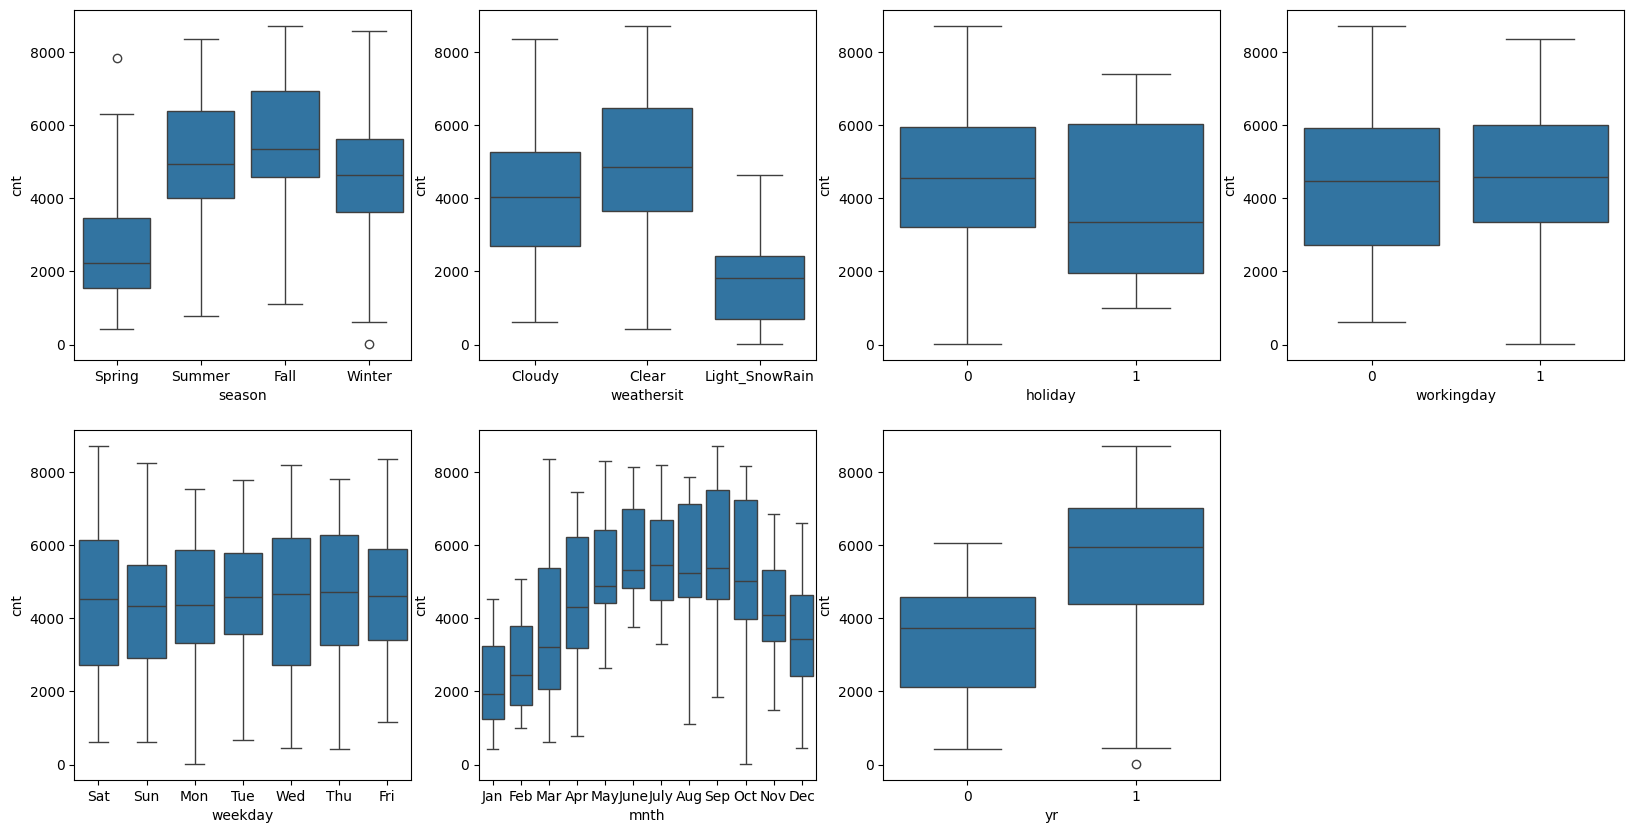

In [384]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

#### EDA interpretation
- Spring season seems to have lower utilization of the bikes
- Clear weather implies higher demand for the bikes
- Day of week doesn't seem to influence the demand for bikes
- April to Sep has an increasing trend of bike utilization
- There is an year on year increase in bike utilization

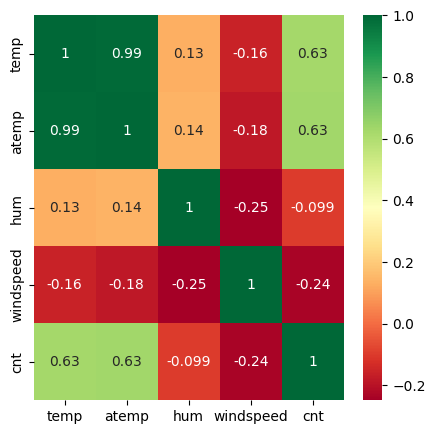

In [385]:
# Plot heatmap to find the correlation
plt.figure(figsize=(5,5))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot=True, cmap="RdYlGn")
plt.show()

Features temp and atemp have multicolinearity and cannot be used together in the model and shall be removed based on the p-value and VIF

## Data Preparation
- Create the dummy variables for the categorical variables

In [386]:
# Based on EDA, workingday and weekday has not much influence on the bike demand and hence dropping those column
df.drop(['workingday','weekday'],axis=1,inplace=True)

In [387]:
# Dummy variable creation for month, weekday, weathersit and season variables.

df = pd.get_dummies(df, columns=['season','mnth','weathersit'], drop_first=True, dtype=int)
df.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Light_SnowRain
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   temp                       730 non-null    float64
 3   atemp                      730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   cnt                        730 non-null    int64  
 7   season_Spring              730 non-null    int64  
 8   season_Summer              730 non-null    int64  
 9   season_Winter              730 non-null    int64  
 10  mnth_Aug                   730 non-null    int64  
 11  mnth_Dec                   730 non-null    int64  
 12  mnth_Feb                   730 non-null    int64  
 13  mnth_Jan                   730 non-null    int64  

# Split data into training and testing sets

In [389]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [390]:
print(df_train.shape)
print(df_test.shape)

(510, 23)
(220, 23)


In [391]:
# scale the numeric variables in training dataset

scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Light_SnowRain
576,1,0,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,1,0,0,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [392]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Light_SnowRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.345098,0.029412
std,0.500429,0.157763,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


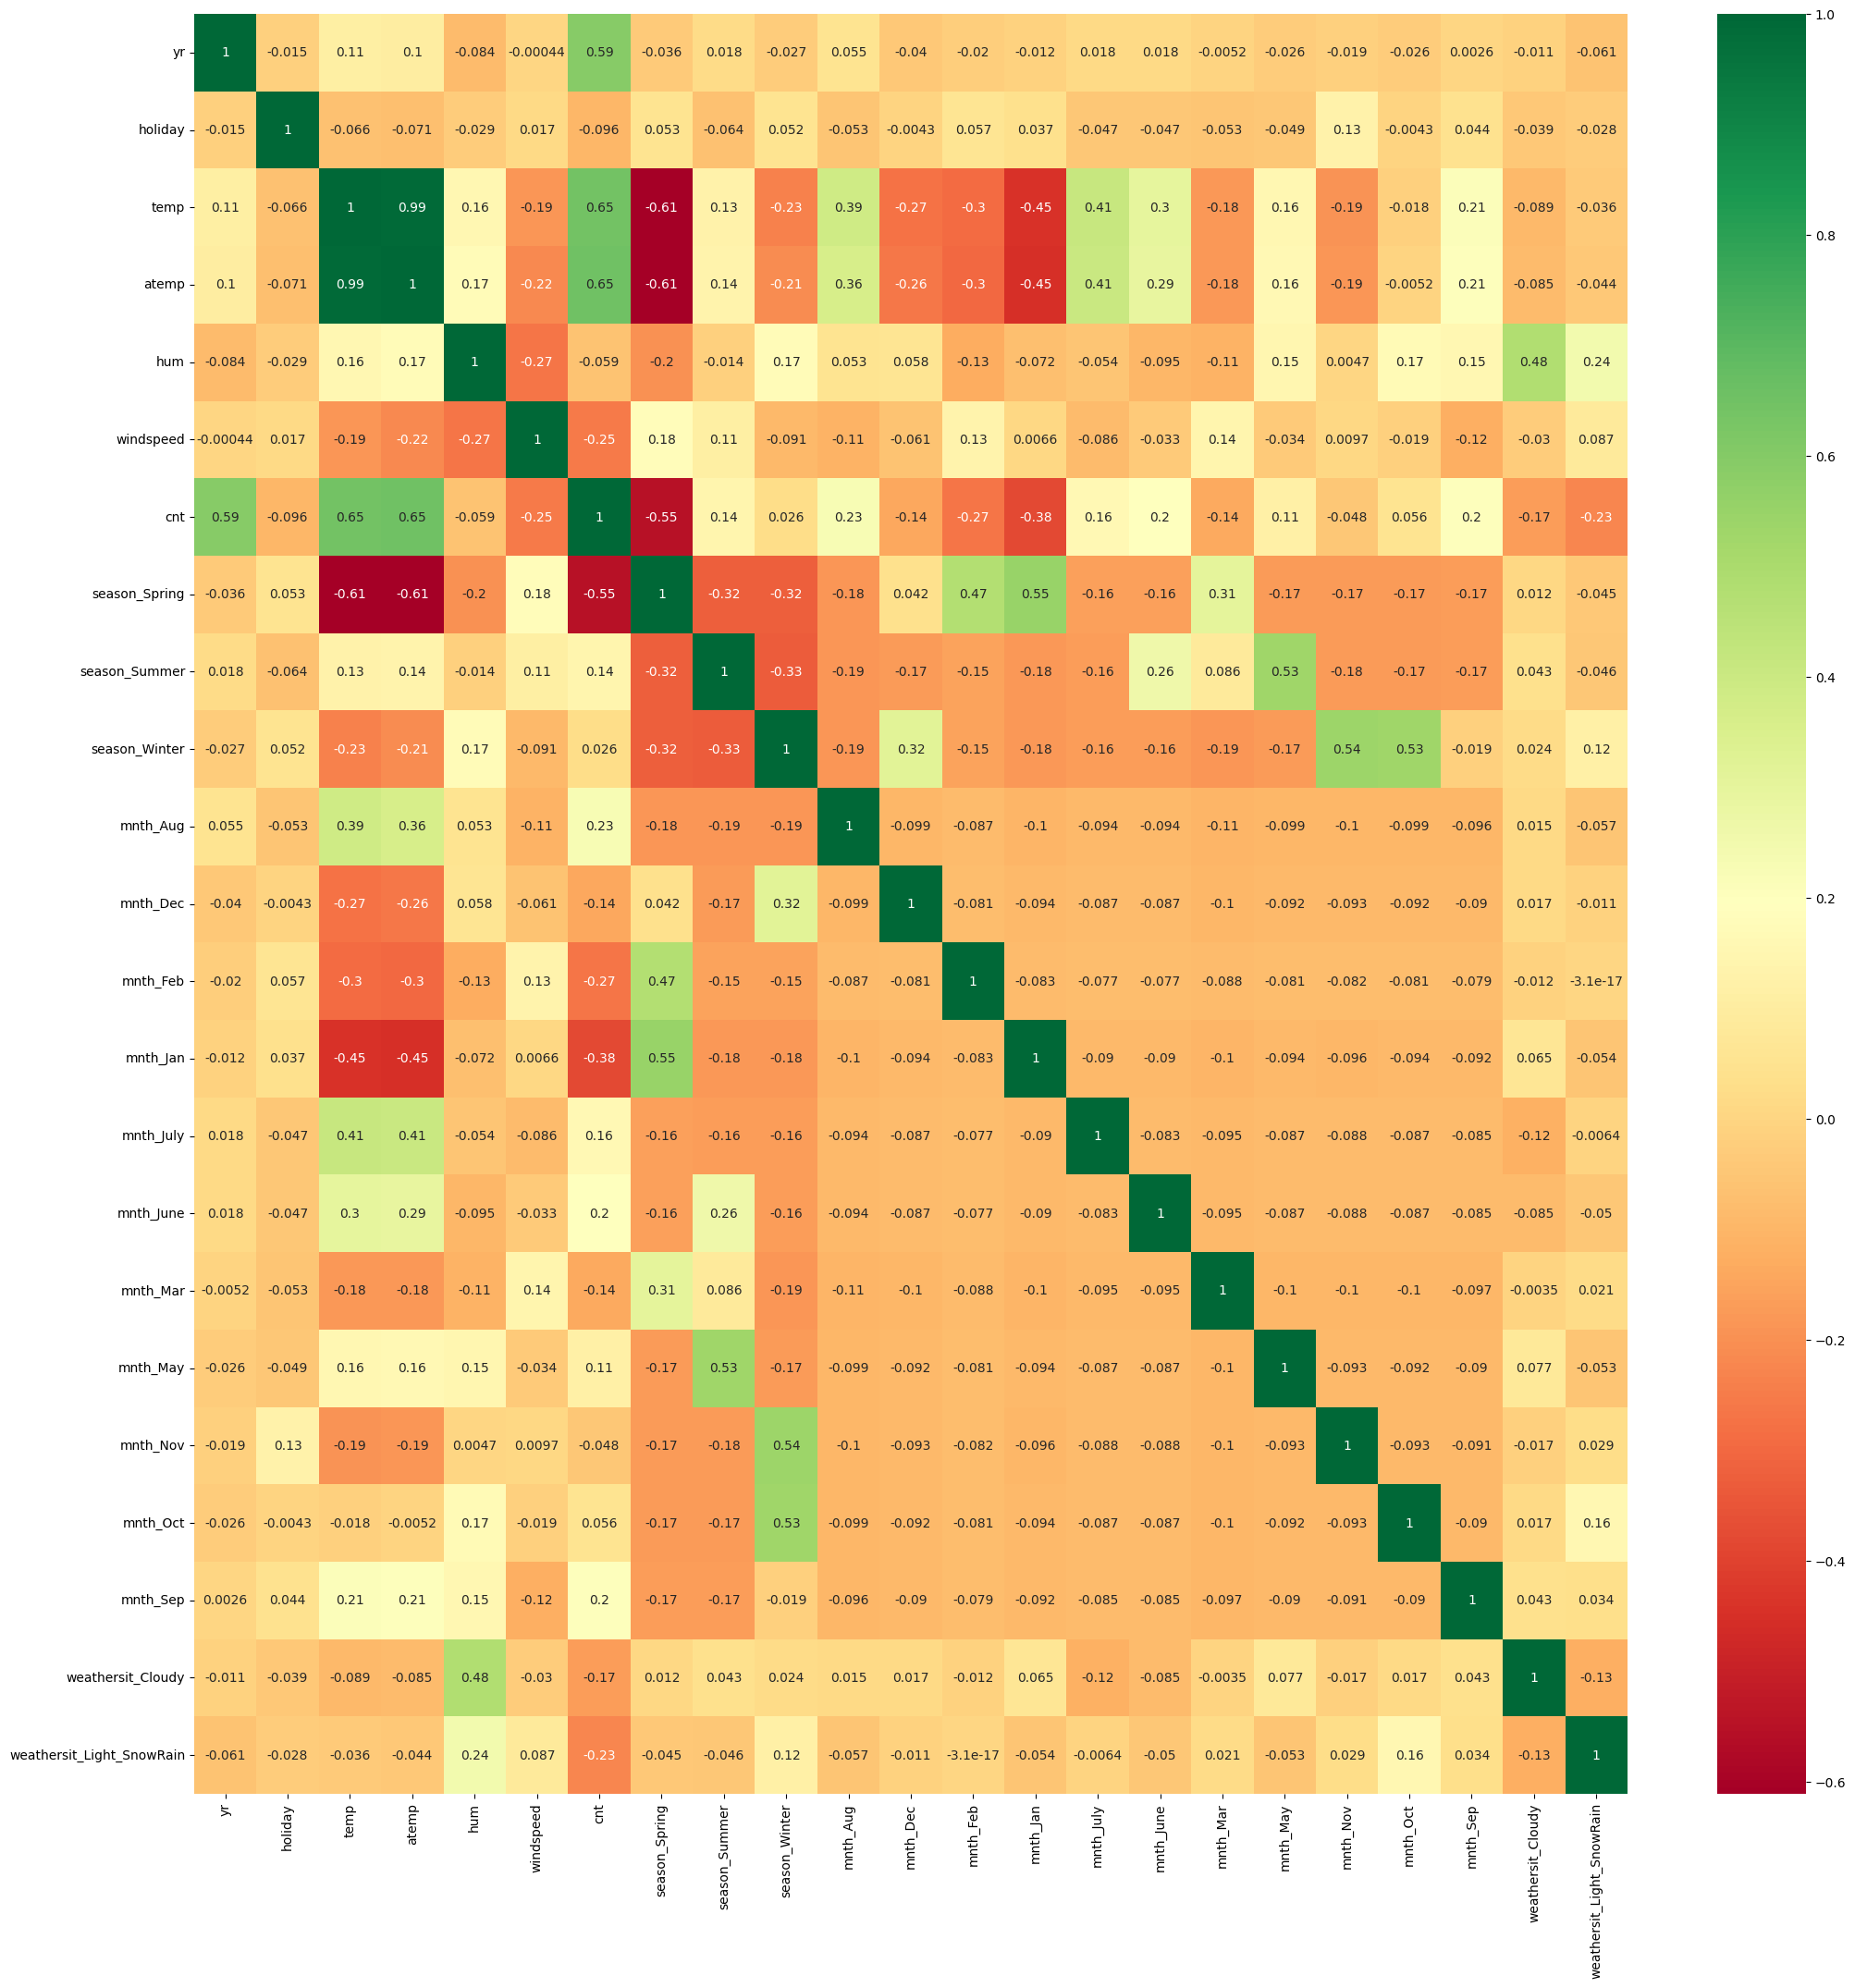

In [393]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Build the  linear regression model using Recursive Feature Elimination (RFE)

In [394]:
# Create X and y variables for the model
y_train = df_train.pop('cnt')
X_train = df_train

In [395]:
# Build the linear regression model
lm = LinearRegression()

# Perform RFE to select the best features
rfe = RFE(lm, n_features_to_select=12)
rfe = rfe.fit(X_train, y_train)

# Print the selected features
print(list(X_train.columns[rfe.support_]))

# Build the model with selected features
X_train_rfe = X_train[X_train.columns[rfe.support_]]
lm.fit(X_train_rfe, y_train)



['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Summer', 'season_Winter', 'mnth_July', 'mnth_Sep', 'weathersit_Cloudy', 'weathersit_Light_SnowRain']


LinearRegression()

In [396]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 5),
 ('mnth_Jan', False, 2),
 ('mnth_July', True, 1),
 ('mnth_June', False, 11),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 7),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 9),
 ('mnth_Sep', True, 1),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light_SnowRain', True, 1)]

In [397]:
# List the selected columns and rejected columns based on RFE
print(X_train.columns[rfe.support_])
print(X_train.columns[~rfe.support_])

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_July', 'mnth_Sep',
       'weathersit_Cloudy', 'weathersit_Light_SnowRain'],
      dtype='object')
Index(['atemp', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct'],
      dtype='object')


In [398]:
def calculate_vif(X_train_rfe):
  vif = pd.DataFrame()
  vif['Features'] = X_train_rfe.columns
  vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

In [399]:
calculate_vif(X_train_rfe)

                     Features    VIF
3                         hum  28.03
2                        temp  16.03
4                   windspeed   4.65
5               season_Spring   4.01
7               season_Winter   3.33
6               season_Summer   2.79
10          weathersit_Cloudy   2.28
0                          yr   2.08
8                   mnth_July   1.58
9                    mnth_Sep   1.38
11  weathersit_Light_SnowRain   1.24
1                     holiday   1.04


# Build linear regression model using selected features using stat model

In [400]:
# First version of model
X_train_lm = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_lm).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.95e-190
Time:                        14:35:47   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [401]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculate_vif(X_train_new)

                     Features   VIF
2                        temp  5.09
3                   windspeed  4.60
5               season_Summer  2.23
4               season_Spring  2.08
0                          yr  2.07
6               season_Winter  1.78
7                   mnth_July  1.58
9           weathersit_Cloudy  1.55
8                    mnth_Sep  1.34
10  weathersit_Light_SnowRain  1.08
1                     holiday  1.04


In [402]:
# Buils second version of model as the VIF values seems to be ok
X_train_lm = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_lm).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          5.06e-187
Time:                        14:35:47   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### All the p-values are within the limit and the VIF values are within acceptable range. The F-stat value is greater than 1 and p(F) close to zero.

### Model version-2 is the best-fit

In [403]:
# Final list of parameters and its coefficients
print(lm2.params)

const                        0.199434
yr                           0.233570
holiday                     -0.097463
temp                         0.490988
windspeed                   -0.147919
season_Spring               -0.067169
season_Summer                0.046487
season_Winter                0.081741
mnth_July                   -0.052057
mnth_Sep                     0.076846
weathersit_Cloudy           -0.080167
weathersit_Light_SnowRain   -0.284199
dtype: float64


## Residual Analysis

In [404]:
# predict the y_train based on the selected model lm2
y_train_pred = lm2.predict(X_train_lm)
y_train_pred.head()

,0
576,0.742032
426,0.465108
728,0.388090
482,0.565713
111,0.279196


### Error-terms distribution

Text(0.5, 0, 'Errors')

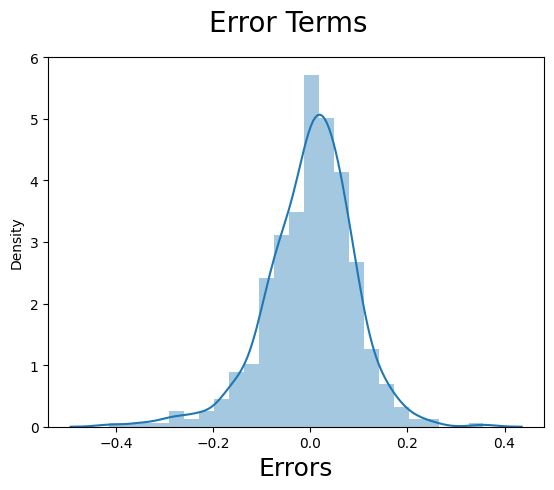

In [405]:
# Plot the error terms in histogram
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Error terms follows a perfect normal curve centered at 0.0

#### Linearity validation

<Figure size 600x600 with 0 Axes>

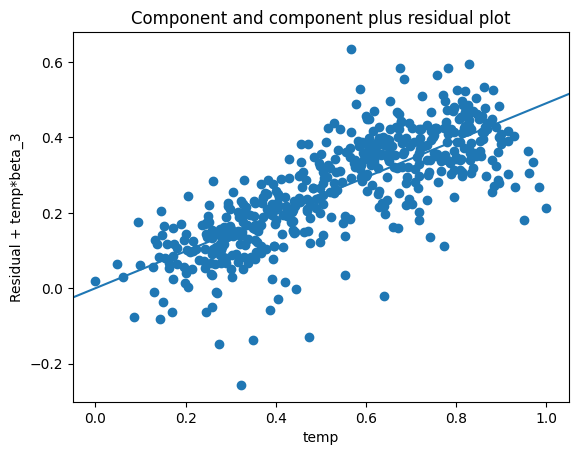

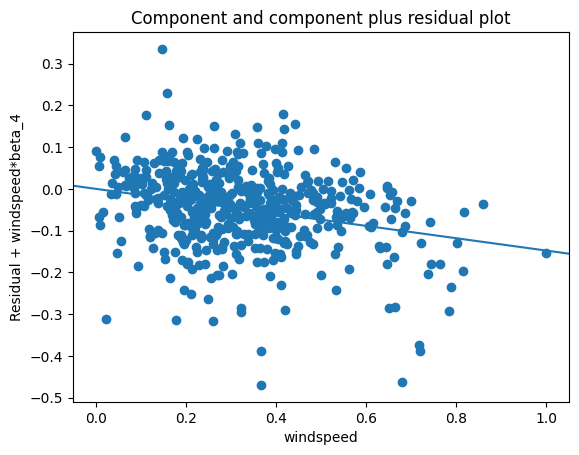

In [406]:
# Validation using Component and component plus residual plot - CCPR plot
# Validate the model linearity with temp
plt.figure(figsize=(6,6))

sm.graphics.plot_ccpr(lm2, 'temp')
plt.show()
# Validate the model linearity with windspeed

sm.graphics.plot_ccpr(lm2, 'windspeed')
plt.show()

- Above plots indicate the linearity of the model with the given features

# Predict the values with the final model (lm2)

In [407]:
# Scaling the test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [408]:
df_test.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Light_SnowRain
184,0,1,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,1,0,0,0,0,0,0,1,0
535,1,0,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,1,0,0,0,0,0,0,0
299,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,1,0,1,0
221,0,0,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [409]:
df_test.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Jan,mnth_July,mnth_June,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weathersit_Cloudy,weathersit_Light_SnowRain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [410]:
# Create X and y variables for the test data
y_test = df_test.pop('cnt')
X_test = df_test

# Use the same features selected during the training phase
X_test_new = X_test[X_train_new.columns]

# Add constant to the test data
X_test_lm = sm.add_constant(X_test_new)

# Predict using the lm2 model
y_test_pred = lm2.predict(X_test_lm)


In [411]:
# Calculate the r2 square value for the predicted values
r2_score(y_test, y_test_pred)


0.8052680349048551

### - The R-square value of 0.8053 indicate a good fit of the model inline with the trained data

In [412]:
# calculate the adjusted r2

def adjusted_r2(r2, n, p):
  return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Calculate the adjusted R-squared for the test data
n = len(y_test)
p = X_test_new.shape[1]
adjusted_r2_test = adjusted_r2(r2_score(y_test, y_test_pred), n, p)

print("Adjusted R-squared (Test):", adjusted_r2_test)


Adjusted R-squared (Test): 0.794969709827708


### - Adjusted R-squared value is closer to the R-squared value

# Evaluate the model

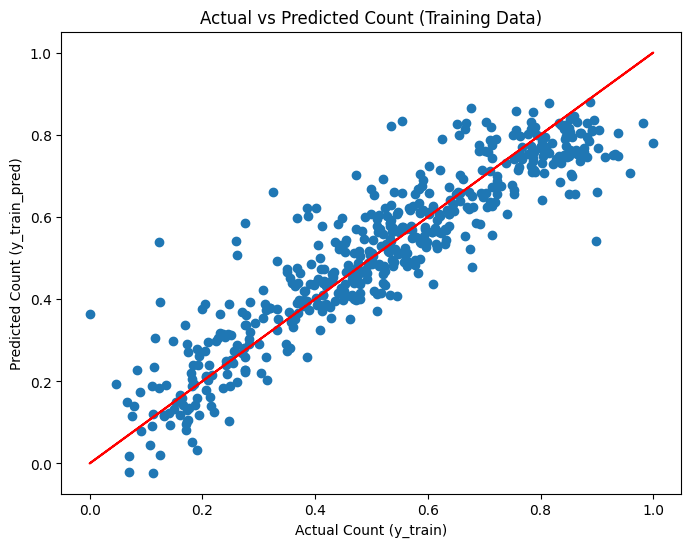

In [413]:
# Scatter plot of y_train vs y_pred with regression fit line
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train, color='red')
plt.xlabel("Actual Count (y_train)")
plt.ylabel("Predicted Count (y_train_pred)")
plt.title("Actual vs Predicted Count (Training Data)")
plt.show()


# Summary
#### The demands for bike rental is dependent on
      - Temperature
      - Windsoeed
      - Increases year-on-year
      - weather situation
      - Season
      

### Comparison of training vs predictions
#### - R2 value for training data = 0.835
#### - Adjusted R2 value for training data = 0.832
#### - R2 value for test data = 0.805
#### - Adjusted R2 value for test data = 0.795